<a href="https://colab.research.google.com/github/suryagokul/Time-Series-ForeCasting/blob/main/FBPROPHET_TIME_SERIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Using Facebook Fbprophet..

In [11]:
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/FbProphet/master/airline_passengers.csv")

In [4]:
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [7]:
df.dropna(inplace=True,axis=0)


In [8]:
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


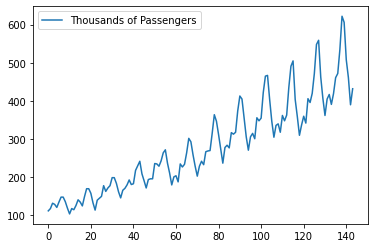

In [10]:
df.plot()

<b>FB PROPHET requires datetime columns as 'ds' and target as 'y'<b>

In [15]:
df.columns = ['ds','y']

df[:4]

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0


In [17]:
type(df['ds'][0])

str

In [19]:
df['ds'] = pd.to_datetime(df['ds'])

In [20]:
type(df['ds'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
df[:4]

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0


In [22]:
from fbprophet import Prophet

In [23]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [24]:
model = Prophet()

In [25]:
model.fit(df)                   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


`Automatically Disables Weekly and Daily Seasonality because our data have Yearly trend as shown above.`

In [26]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

`By this we can say that our data have Yearly Seasonality...`

In [30]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [27]:
future_dates = model.make_future_dataframe(periods=365)

`make_future_dataframe(periods=365) creates dates from 1960 which is last year in our ds dataframe to 1961 i.e 365 days..`




In [28]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


`It appends dates into our ds series as shown above...`

In [31]:
predictions = model.predict(future_dates)

In [32]:
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.727984,57.364107,113.807331,106.727984,106.727984,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,0.0,0.0,0.0,84.807353
1,1949-02-01,108.901201,52.842055,107.961872,108.901201,108.901201,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,0.0,0.0,0.0,78.218354
2,1949-03-01,110.864107,83.974363,141.393134,110.864107,110.864107,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,0.0,0.0,0.0,110.361397
3,1949-04-01,113.037323,77.736213,136.653590,113.037323,113.037323,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,0.0,0.0,0.0,107.851823
4,1949-05-01,115.140437,82.697011,138.650806,115.140437,115.140437,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,0.0,0.0,0.0,111.351735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1961-11-27,520.639276,471.962451,525.792433,520.052546,521.187728,-22.354203,-22.354203,-22.354203,-22.354203,-22.354203,-22.354203,0.0,0.0,0.0,498.285073
505,1961-11-28,520.739726,468.732619,525.860658,520.152718,521.292357,-23.984202,-23.984202,-23.984202,-23.984202,-23.984202,-23.984202,0.0,0.0,0.0,496.755524
506,1961-11-29,520.840176,466.152407,522.336888,520.251180,521.396986,-26.252105,-26.252105,-26.252105,-26.252105,-26.252105,-26.252105,0.0,0.0,0.0,494.588071
507,1961-11-30,520.940625,463.047988,521.126745,520.347697,521.501615,-29.113730,-29.113730,-29.113730,-29.113730,-29.113730,-29.113730,0.0,0.0,0.0,491.826895


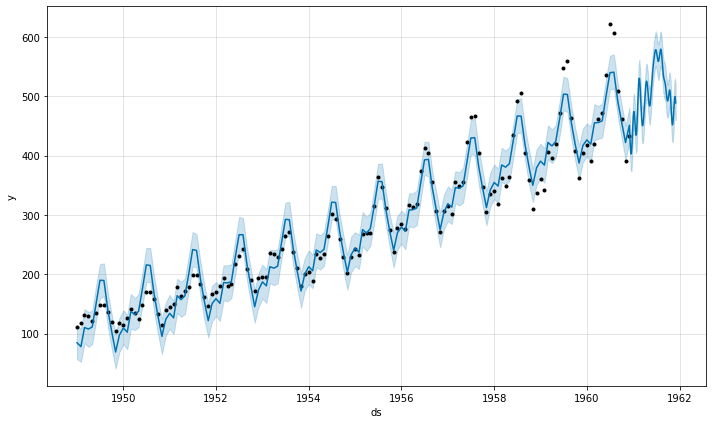

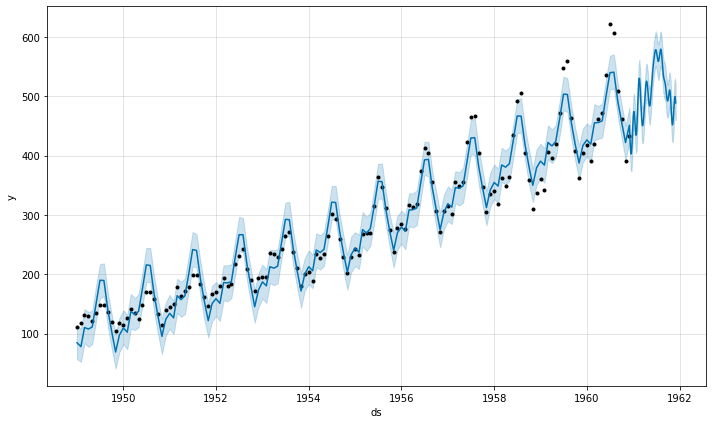

In [33]:
model.plot(predictions)

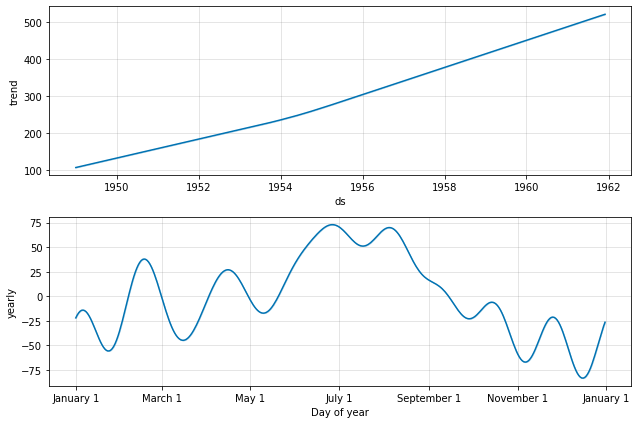

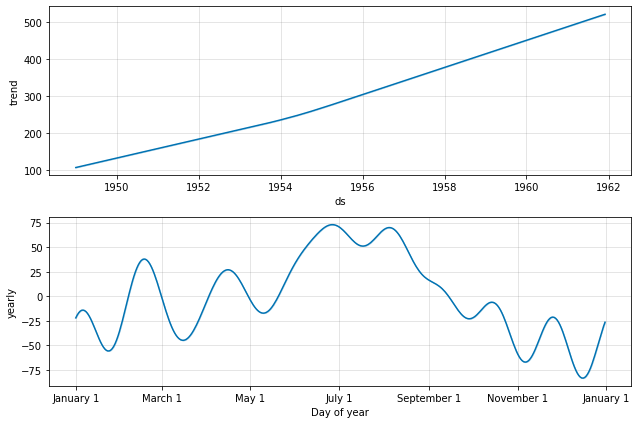

In [34]:
model.plot_components(predictions)            # Visualizing Components [Trends, Yearly]

In [35]:
from fbprophet.diagnostics import cross_validation

In [38]:
cv = cross_validation(model,horizon='365 days',period='180 days',initial='730 days')

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [49]:
cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,158.013969,157.798209,158.167374,150.0,1951-01-18
1,1951-03-01,171.224502,170.505944,171.798157,178.0,1951-01-18
2,1951-04-01,159.628157,158.243757,160.871749,163.0,1951-01-18
3,1951-05-01,145.666500,143.392502,147.737390,172.0,1951-01-18
4,1951-06-01,180.679910,177.325533,183.549184,178.0,1951-01-18
...,...,...,...,...,...,...
223,1960-08-01,524.361022,499.229382,550.796027,606.0,1959-12-02
224,1960-09-01,485.319957,457.844264,512.579307,508.0,1959-12-02
225,1960-10-01,452.658227,425.657819,478.529315,461.0,1959-12-02
226,1960-11-01,423.892925,398.065444,449.636439,390.0,1959-12-02


`It takes 1949 and 1950 as training data for cross validation and remaining for test data as given above`

In [53]:
df

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0
...,...,...
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0


In [39]:
from fbprophet.diagnostics import performance_metrics

In [47]:
df_p = performance_metrics(cv)

df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1083.476338,32.916202,25.895616,0.078758,0.073725,0.227273
1,42 days,1009.201759,31.767936,25.246674,0.077080,0.073725,0.181818
2,46 days,906.510734,30.108317,24.749820,0.079413,0.084057,0.136364
3,47 days,1039.076713,32.234713,26.867165,0.082299,0.085796,0.136364
4,48 days,1027.847500,32.060061,26.277771,0.080195,0.085796,0.181818


In [41]:
from fbprophet.plot import plot_cross_validation_metric

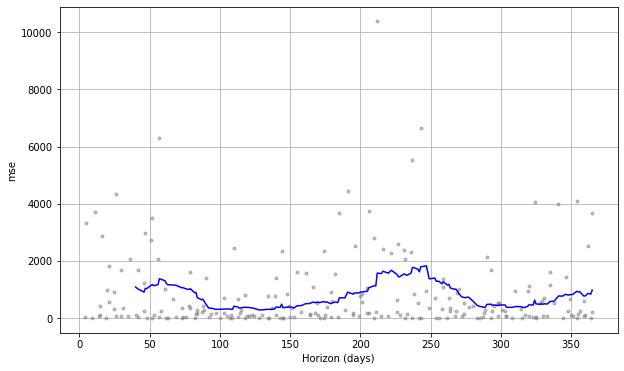

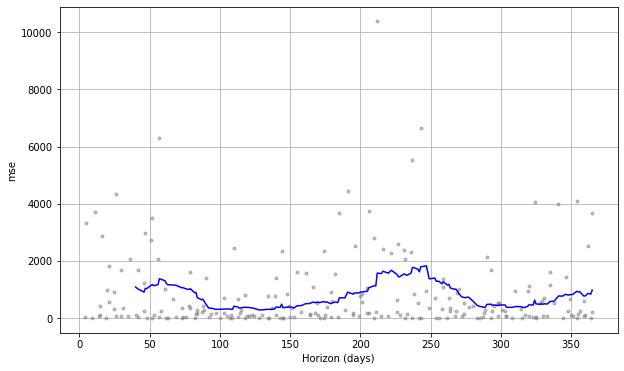

In [48]:
plot_cross_validation_metric(cv,metric='mse')